# PRE-PROCESSING
## BINARIZZAZIONE

### Binarizzazione a soglia fissa
Per ogni pixel viene applicato lo stesso valore di soglia: se il valore del pixel è inferiore alla soglia, è impostato su 0, altrimenti è impostato su un valore massimo.
Per applicare questo valore di soglia usiamo la libreria cv2, in particolare il metodo threshold:
In cv2.threshold il primo argomento è l'immagine sorgente (in scala di grigi); il secondo argomento è il valore di soglia utilizzato per classificare i valori dei pixel; il terzo argomento è il valore massimo assegnato a valori di pixel che superano la soglia e infine OpenCV fornisce diversi tipi di soglie fornite dal quarto parametro della funzione. 
In questo caso la soglia di base viene eseguita utilizzando il tipo cv.THRESH_BINARY. 

Il metodo ha due output: il primo è la soglia utilizzata (in questo caso 127) e il secondo è l'immagine effettivamente binarizzata.

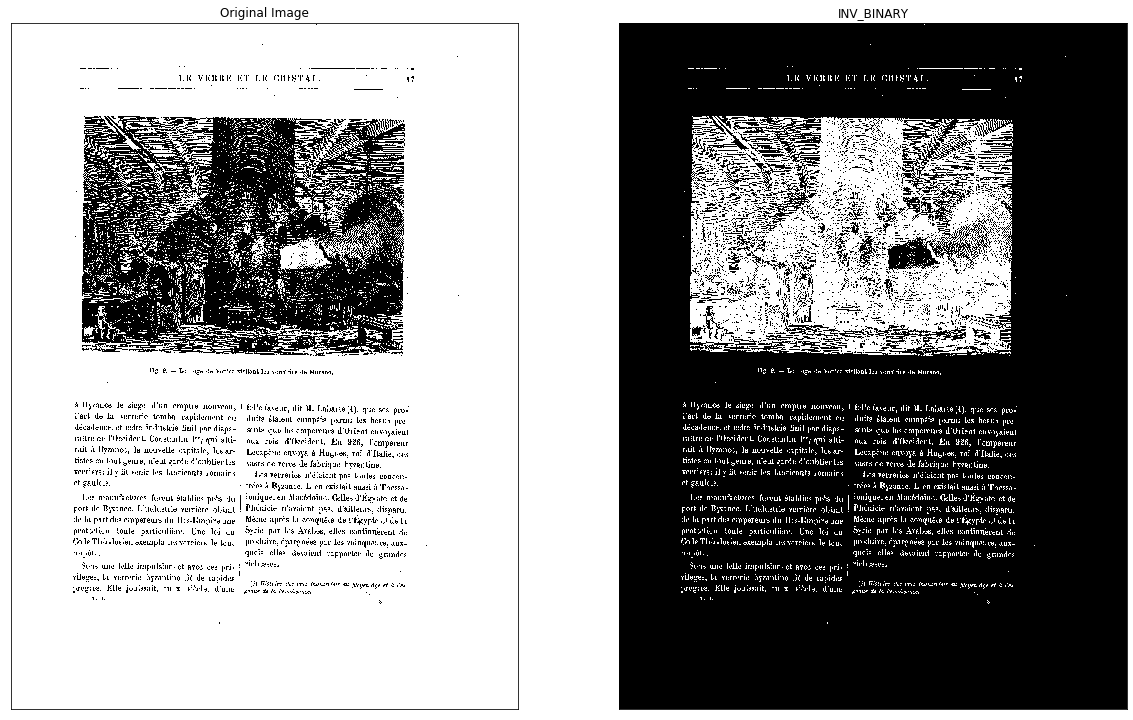

In [50]:
import cv2
import numpy as np
import os, sys
from matplotlib import pyplot as plt
#np.savetxt('matriciona.txt',labels, fmt='%10.5f', delimiter='\t')
#path = 'D:/OpenCV/Scripts/Images'
#cv2.imwrite(os.path.join(path , 'x.jpg'),img)

img_name='prova2.tif'
img = cv2.imread(img_name,0)
_,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
new_name=img_name[:-4]+'_bin.tif'
cv2.imwrite(new_name, thresh)

titles = ['Original Image','INV_BINARY']
images = [img, thresh]

for i in range(1):    
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(1,2,i+2),plt.imshow(images[i+1],'gray')
    plt.title(titles[i+1]), plt.xticks([]), plt.yticks([])
    '''    
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    #plt.savefig('thresh.png', dpi=1800)
    '''
plt.show()



### Binarizzazione Otsu
Nell'analisi dei documenti, spesso le immagini a disposizione possono avere del rumore, abbiamo quindi bisogno di un metodo per separare il background dal foreground. 
La soglia Otsu, che può essere applicata nella segmentazione e nella binarizzazione delle immagini, è un metodo di soglia adattativo.
Esaminando tutti i possibili valori di soglia (da 0 a 255), trova il valore di soglia ottimale in modo che la varianza sia minima.
Utilizziamo l'istogramma per rappresentare la distribuzione del valore dei pixel(tra 0 e 255).
Scegliendo come valore di soglia 2, l'immagine viene separata in due classi, che corrispondono al background e al foreground.

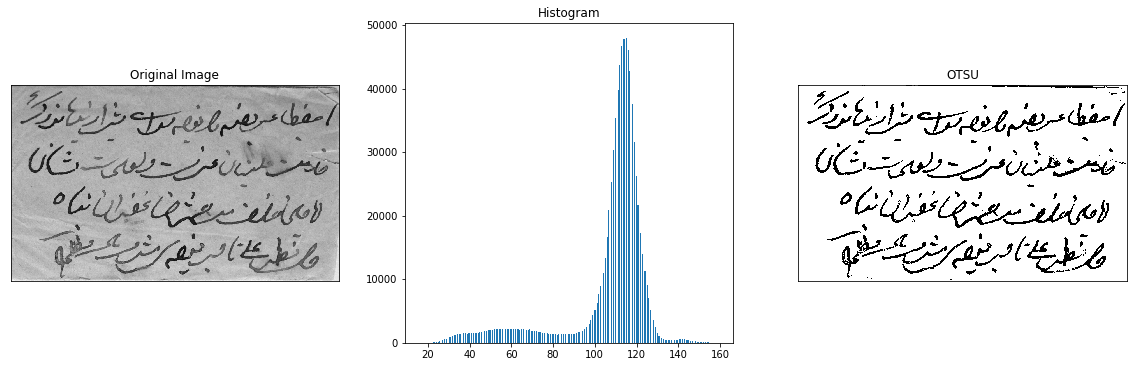

"\nplt.title(titles[0])\nplt.imshow(images[0],'gray'), plt.xticks([]), plt.yticks([])\nplt.show()\nplt.title(titles[1])\nplt.hist(images[0].ravel(),256)\nplt.show()\nplt.title(titles[2])\nplt.imshow(images[2],'gray'), plt.xticks([]), plt.yticks([])\nplt.show()\n"

In [775]:
import cv2
import numpy as np
import os, sys
from matplotlib import pyplot as plt

img_name='persian.jpg'
img = cv2.imread(img_name,0)
_,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
new_name=img_name[:-4]+'_otsu.tif'
cv2.imwrite(new_name, thresh)

titles = ['Original Image','Histogram',"OTSU"]
images = [img, 0, thresh]

for i in range(1):
    plt.figure(figsize=(20,20))
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i+2),plt.hist(images[i].ravel(),256)
    plt.title(titles[i+1])#, plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i+3),plt.imshow(images[i+2],'gray')
    plt.title(titles[i+2]), plt.xticks([]), plt.yticks([])
    #plt.savefig('thresh_otsu.png', dpi=1800)
    
plt.show()

"""
plt.title(titles[0])
plt.imshow(images[0],'gray'), plt.xticks([]), plt.yticks([])
plt.show()
plt.title(titles[1])
plt.hist(images[0].ravel(),256)
plt.show()
plt.title(titles[2])
plt.imshow(images[2],'gray'), plt.xticks([]), plt.yticks([])
plt.show()
"""




### Binarizzazione Sauvola 
La binarizzazione Sauvola è una tecnica di binarizzazione locale utile per le immagini in cui lo sfondo non è uniforme, in particolare invece di calcolare una singola soglia globale per l'intera immagine, vengono calcolate più soglie per ogni pixel utilizzando formule specifiche che tengono conto della deviazione media e standard dei vicini(definito da una finestra centrata attorno al pixel).

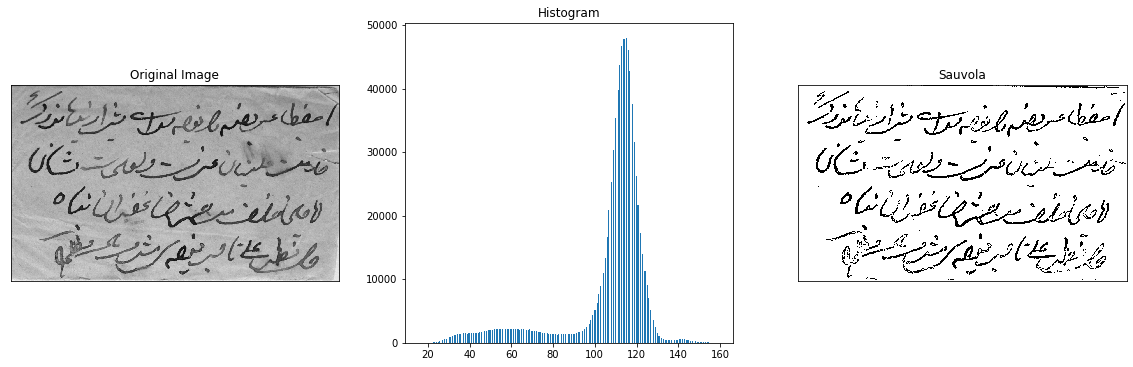

In [43]:
from skimage.filters import threshold_sauvola
import sklearn.preprocessing 

img_name='persian.jpg'
img = cv2.imread(img_name,0)
bin_sauvola = sklearn.preprocessing.binarize(img, threshold_sauvola(img))
#bin_sauvola è binaria: 0 è nero, 1 è bianco -> per visualizzarla imposto 1=255
rows,cols=bin_sauvola.shape
for i in range(rows):
    for j in range(cols):
        if bin_sauvola[i][j]==1:
            bin_sauvola[i][j]=255
new_name=img_name[:-4]+'_sauvola.tif'
cv2.imwrite(new_name, bin_sauvola)

titles = ['Original Image','Histogram',"Sauvola"]
images = [img_gray, 0, bin_sauvola]

for i in range(1):
    plt.figure(figsize=(20,20))
    plt.subplot(3,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i+2),plt.hist(images[i].ravel(),256)
    plt.title(titles[i+1])#, plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i+3),plt.imshow(images[i+2],'gray')
    plt.title(titles[i+2]), plt.xticks([]), plt.yticks([])
    #plt.savefig('thresh_otsu.png', dpi=1800)
plt.show()

## CONNECTED COMPONENTS
Le **componenti connesse** sono utilizzate nella document recognition  per segmentare e identificare gli elementi in un’immagine binaria. In particolare l’algoritmo per determinare le CC è iterativo ed etichetta un immagine in base alla vicinanza con il pixel vicino; due pixel sono vicini se sono tra loro connessi, si distingue quindi la connettività a 4 e ad 8 pixel.

Anche in questo caso per calcolare le CC utilizziamo la libreria cv2, infatti tramite la funzione connectedComponents( ), che ci permette di indicare il valore di connettività da utilizzare (4 o 8), possiamo calcolare il numero di cc rilevate e una matrice con le stesse dimensioni dell’immagine di input in cui ogni pixel ha un valore: tutti i pixel 0 rappresentano lo sfondo, il pixel che ha valore 1 rappresenta il primo cc e così via.

number of CC with connectivity 4: 49


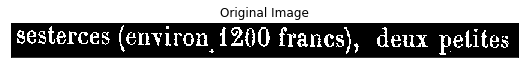

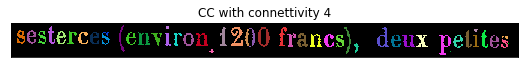

number of CC with connectivity 8: 45


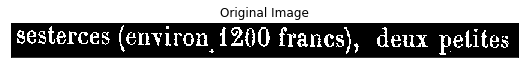

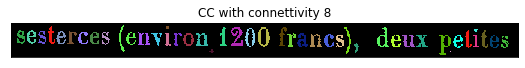

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import *

img_name='row.tif'
img = cv2.imread(img_name, 0)
img = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
#img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)[1]
    
def show_CC(img,conn):
    cc, labels = cv2.connectedComponents(img,connectivity=conn)
    #creo immagine a 3 canali
    labeled_img = cv2.merge([labels,labels,labels])
    rows,cols,ch= np.shape(labeled_img)
    #creo una matrice di colori da assegnare alle componenti connesse
    savedcolor=random_colors(cc)
    
    for i in range(rows):
        for j in range(cols):
            if labeled_img[i][j][0]!=0:
                for h in range(len(savedcolor)):
                    if labeled_img[i][j][0]==savedcolor[h][0]:
                        labeled_img[i][j]=savedcolor[h][1] #se uso 10colori, devo fare modulo 10           

    if conn==4:
        new_name=img_name[:-4]+'_CC4.tif'
        cv2.imwrite(new_name,labeled_img)
        print('number of CC with connectivity 4:',cc)
        titles = ['Original Image','CC with connettivity 4']
    elif conn==8:
        new_name=img_name[:-4]+'_CC8.tif'
        cv2.imwrite(new_name,labeled_img)
        print('number of CC with connectivity 8:',cc)
        titles = ['Original Image','CC with connettivity 8']
    images = [img, labeled_img]
    for i in range(2):
        plt.figure(figsize=(20,20))
        plt.subplot(1,2,i+1),plt.imshow((images[i]),'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])

    plt.show()
    
def random_colors(cc):
    savedcolor=[]
    for k in range(cc):
        color = list(np.random.choice(range(256), size=3))
        savedcolor.append([k,color])
    savedcolor[0][1]=[0,0,0]
    return savedcolor
    
def main_colors(cc):
    savedcolor=[]
    main_color=[[255,0,0],[255,255,255],[255,255,0],[0,255,0],[0,255,255],[0,0,255],[255,0,255],[128,0,128],[0,128,0]]
    for l in range(cc):
        color=randint(0,8)
        savedcolor.append([l,main_color[color]])
    savedcolor[0][1]=[0,0,0]
    return savedcolor


show_CC(img,4)
show_CC(img,8)

## RLSA
Il Run Length Smoothing Algorithm (RLS) è un metodo che viene utilizzato nell'analisi dei documenti e mira a suddividere l'area di un documento in regioni, ognuna delle quali dovrebbe contenere solo un tipo di dati. 
 

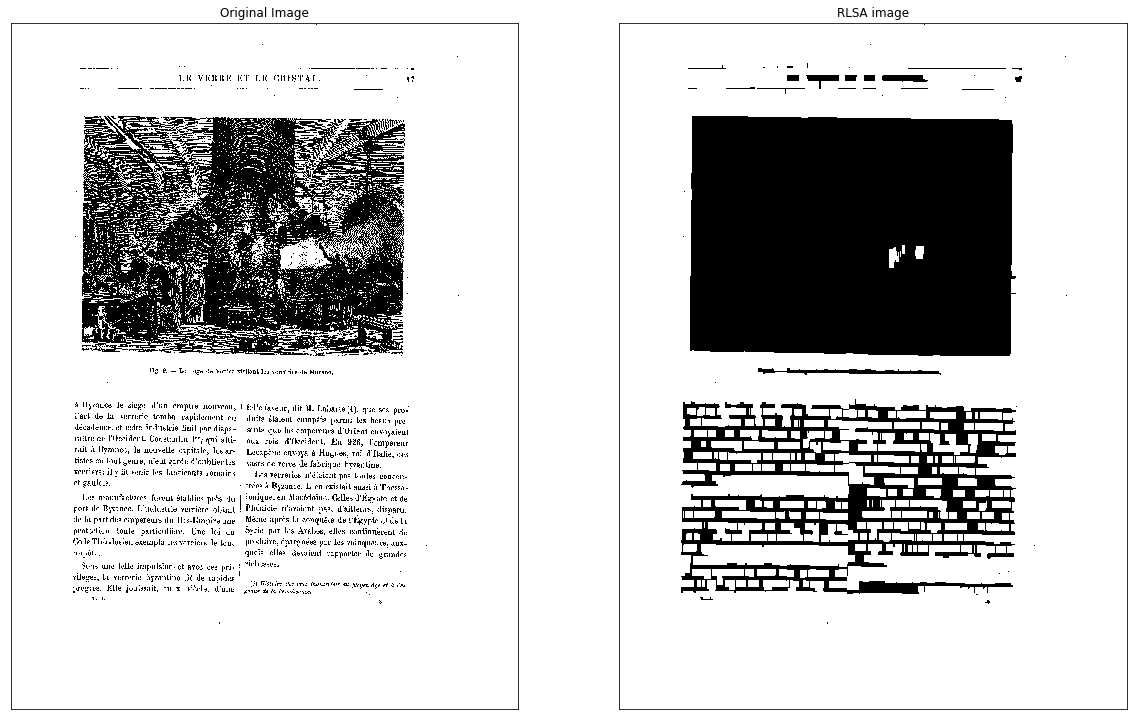

In [25]:
import numpy

img_name='prova2.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

    #esegue l'iterazione sull'immagine fornita convertendo il valore del pixel da 255 a 0 se 
    #il numero di pixel consecutivi con valore 255 è minore del "valore" fornito
def iteration(image, value: int):
    rows, cols = image.shape
    for row in range(rows):
        try:
            start = image[row].tolist().index(0)
        except ValueError:
            start = 0

        count = start
        for col in range(start, cols):
            if image[row, col] == 0:
                if (col-count) <= value and (col-count) > 0:
                    image[row, count:col] = 0               
                count = col  
    return image 


    #RLSA consiste nell'estrarre il blocco di testo o la Regione di interesse(ROI) dall'immagine binaria
    #del documento. Bisogna passargli un'immagine binaria di tipo ndarray.
def rlsa(image, horizontal: bool = True, vertical: bool = True, value: int = 0):
    if horizontal:
            image = iteration(image, value)
    if vertical: 
            image = image.T
            image = iteration(image, value)
            image = image.T
    return image

newimg=rlsa(img_bin,value=30)
new_name=img_name[:-4]+'_RLSA.tif'
cv2.imwrite(new_name,newimg)
titles = ['Original Image','RLSA image']
images = [img, newimg]

for i in range(1):
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,i+1),plt.imshow((images[i]),'gray')
    plt.title(titles[i]), plt.xticks([]), plt.yticks([])

    plt.subplot(1,2,i+2),plt.imshow(images[i+1],'gray')
    plt.title(titles[i+1]), plt.xticks([]), plt.yticks([])

**Come sapere quale value mettere nella funzione RLSA?**

Viene stabilito in base alla distanza media dei pixel nell'immagine. La seguente funzione calcola la distanza tra i pixel e ne fa la media.

trovo le CC, faccio il quadratino, trovo il centroide del quadratino, calcolo la distanza tra i centroidi..trovo la distanza media

2361
4
midW 12.757476294675419
value 19.80144557823129
Final value: 7.043969283555873
Round Final Value 7.0


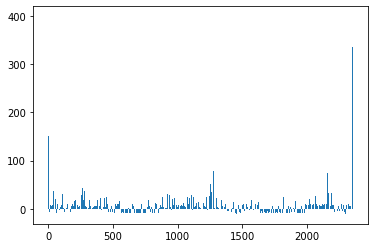

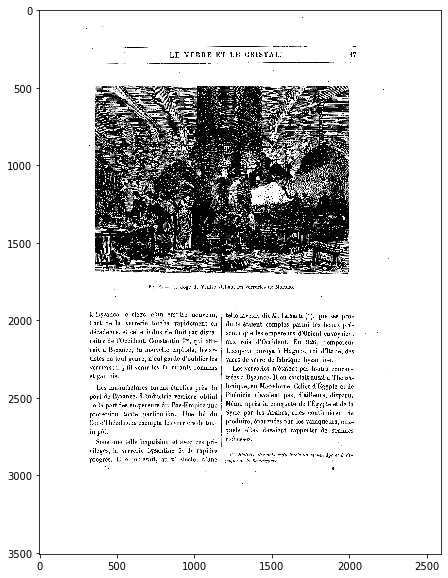

In [943]:
##################################################################################################################
                
                                    #QUESTO E' IL CODICE GIUSTO PER ADPTIVE RLSA#
#momentaneamente funziona solo in orizzontale, per farla anche in verticale bisogna fare trasposta e un flag che
# ci dica se è orizzontale o verticale...ci penso io domani!
##################################################################################################################        


import math

img_name='prova0.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

def foundMidCont(img_bin):
    contours,_  = cv2.findContours(np.uint8(np.logical_not(img_bin)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
    #points=[]
    #midH=[]
    midW=[]
    sumW=0
    for contour in contours:
        [x,y,w,h] = cv2.boundingRect(contour)
        midW.append(w)
        #midH.append(h)
    for i in range(len(midW)):
        sumW=sumW+midW[i]
    realMidW=sumW/len(midW)
    print('midW',realMidW)
    return realMidW
    
    '''print([x,y,w,h])
    cv2.rectangle(img_bin, (x,y), (x+w,y+h), (0, 255, 0), 1)
    #non so se usare i centroidi..è un bel casino
    points.append([(x+(x+w))/2,(y+(y+h))/2])
    cX = int((x+(x+w))/2)
    cY = int((y+(y+h))/2)
    cv2.circle(img, (cX, cY), 1, (255, 255, 255), -1)'''

def valueRLSA(distance):
    distance = np.asarray(distance)
    rows=distance.shape[0]
    numSum=0
    sumDist=0 
    distance = distance.astype(np.int)
    
    for k in range(rows):
        sumDist=sumDist+distance[k]
        numSum=numSum+1  
    #print(sumDist, numSum)
            
    value=sumDist/numSum
    print('value',value)
    return value

def findDistance(img_bin):
    points = findCentroids(img_bin,img_centroids)       
    points = np.int32(points)
    edges= minimum_spanning_tree_edges(points,4)
    distance = []
    for edge in edges:
        c1,c2 = edge
        x1,y1 = points[c1]
        x2,y2 = points[c2]
        #print(x1,y1,x2,y2)
        dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        distance.append(dist)
    return distance

distance=findDistance(img_bin)
w=foundMidCont(img_bin)    
v=valueRLSA(distance)
finalV=v-w
print('Final value:',finalV)
rFinalV= round(finalV)
print('Round Final Value',rFinalV)
ciao=[]
distA=[]
for i in range(len(distance)):
    distA.append(distance[i]-w)
    ciao.append(i)

plt.bar(ciao,distA)#ance)
plt.figure(figsize=(10,10))
plt.imshow(img, 'gray')
plt.show()

import math

img_name='prova0.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

def foundMidCont(img_bin):
    contours,_  = cv2.findContours(np.uint8(np.logical_not(img_bin)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
    #points=[]
    #midH=[]
    midW=[]
    sumW=0
    for contour in contours:
        [x,y,w,h] = cv2.boundingRect(contour)
        midW.append(w)
        #midH.append(h)
    #print('midW',midW)
    #print('midH',midH)
    for i in range(len(midW)):
        sumW=sumW+midW[i]
    realMidW=sumW/len(midW)
    print('midW',realMidW)
    return realMidW
    
    '''print([x,y,w,h])
    cv2.rectangle(img_bin, (x,y), (x+w,y+h), (0, 255, 0), 1)
    #non so se usare i centroidi..è un bel casino
    points.append([(x+(x+w))/2,(y+(y+h))/2])
    cX = int((x+(x+w))/2)
    cY = int((y+(y+h))/2)
    cv2.circle(img, (cX, cY), 1, (255, 255, 255), -1)'''

def valueRLSA(distance):
    distance = np.asarray(distance)
    rows=distance.shape[0]
    numSum=0
    sumDist=0 
    distance = distance.astype(np.int)
    
    for k in range(rows):
        sumDist=sumDist+distance[k]
        numSum=numSum+1  
    #print(sumDist, numSum)
            
    value=sumDist/numSum
    print('value',value)
    return value

def findDistance(img_bin):
    points = findCentroids(img_bin,img_centroids)       
    points = np.int32(points)
    edges= minimum_spanning_tree_edges(points,4)
    distance = []
    for edge in edges:
        c1,c2 = edge
        x1,y1 = points[c1]
        x2,y2 = points[c2]
        #print(x1,y1,x2,y2)
        dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        distance.append(dist)
    return distance

distance=findDistance(img_bin)
w=foundMidCont(img_bin)    
v=valueRLSA(distance)
finalV=v-w
print('Final value:',finalV)
rFinalV= round(finalV)
print('Round Final Value',rFinalV)
ciao=[]
distA=[]
for i in range(len(distance)):
    distA.append(distance[i]-w)
    ciao.append(i)

plt.bar(ciao,distA)#ance)
plt.figure(figsize=(10,10))
plt.imshow(img, 'gray')
plt.show()

import math

img_name='prova0.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

def foundMidCont(img_bin):
    contours,_  = cv2.findContours(np.uint8(np.logical_not(img_bin)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
    #points=[]
    #midH=[]
    midW=[]
    sumW=0
    for contour in contours:
        [x,y,w,h] = cv2.boundingRect(contour)
        midW.append(w)
        #midH.append(h)
    #print('midW',midW)
    #print('midH',midH)
    for i in range(len(midW)):
        sumW=sumW+midW[i]
    realMidW=sumW/len(midW)
    print('midW',realMidW)
    return realMidW
    
    '''print([x,y,w,h])
    cv2.rectangle(img_bin, (x,y), (x+w,y+h), (0, 255, 0), 1)
    #non so se usare i centroidi..è un bel casino
    points.append([(x+(x+w))/2,(y+(y+h))/2])
    cX = int((x+(x+w))/2)
    cY = int((y+(y+h))/2)
    cv2.circle(img, (cX, cY), 1, (255, 255, 255), -1)'''

def valueRLSA(distance):
    distance = np.asarray(distance)
    rows=distance.shape[0]
    numSum=0
    sumDist=0 
    distance = distance.astype(np.int)
    
    for k in range(rows):
        sumDist=sumDist+distance[k]
        numSum=numSum+1  
    #print(sumDist, numSum)
            
    value=sumDist/numSum
    print('value',value)
    return value

def findDistance(img_bin):
    points = findCentroids(img_bin,img_centroids)       
    points = np.int32(points)
    edges= minimum_spanning_tree_edges(points,4)
    distance = []
    for edge in edges:
        c1,c2 = edge
        x1,y1 = points[c1]
        x2,y2 = points[c2]
        #print(x1,y1,x2,y2)
        dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        distance.append(dist)
    return distance

distance=findDistance(img_bin)
w=foundMidCont(img_bin)    
v=valueRLSA(distance)
finalV=v-w
print('Final value:',finalV)
rFinalV= round(finalV)
print('Round Final Value',rFinalV)
ciao=[]
distA=[]
for i in range(len(distance)):
    distA.append(distance[i]-w)
    ciao.append(i)

plt.bar(ciao,distA)#ance)
plt.figure(figsize=(10,10))
plt.imshow(img, 'gray')
plt.show()

36293 7092
value: 5.1174562887760855


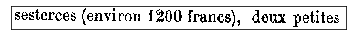

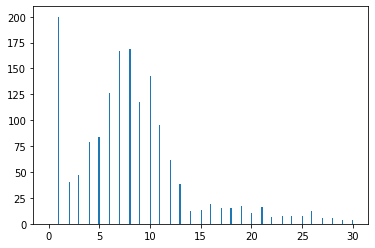

In [904]:
##################################################################################################################

#                                     VECCHIO METODO (da scartare)                                               #

##################################################################################################################

img_name='row.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

def pixelDistance(image, vertical: bool = False):
    if vertical:
        image = image.T #la uso per calcolare la distanza tra pixel in verticale
    rows, cols = image.shape
    distance=[]
    count=0
    i1=0
    flag=0
    i2=0

    for i in range(rows):
        for j in range(cols):
            '''if image[i][j]==255 and image[i][0]==255:
                if i!=i2:
                    flag=1
                    i2=i
                else:
                    flag=flag+1
                    i2=i'''
            if image[i][j]==0:
                if i!=i1:
                    distance.append('-1')
                    i1=i
                    count=0
                elif j-count-flag!=0:
                        distance.append(j-count-flag)
                        flag=0
                        count=j
    
    '''for i in range(len(distance)-1,0,-1):
        if distance[i] ==1:
            distance.remove(distance[i])'''
            
    distance=np.array(distance)
    return distance

def valueRLSA(distance):
    rows=distance.shape[0]
    numSum=0
    sumDist=0 
    distance = distance.astype(np.int)
    
    for k in range(rows):
        if distance[k]!= -1:
            sumDist=sumDist+distance[k]
            numSum=numSum+1  
    print(sumDist, numSum)
            
    value=sumDist/numSum
    print('value:',value)
    return value

def histogram(image,distance):
    rows=distance.shape[0]
    distance = distance.astype(np.int)
    max=0
    for h in range(rows):
        if distance[h]>max:
            max=distance[h]
    
    #serve per rendere il grafico piu leggibile, elimina pixel a distanza 1
    q1=0
    for l in range(rows):
        if distance[l]==1 and q1<200:
            q1=q1+1
        elif distance[l]==1:
            distance[l]=-1
            
    plt.imshow(image,'gray'), plt.xticks([]), plt.yticks([]), plt.show()
    plt.hist(distance,256,[0,30]), plt.show()
    #plt.savefig('hist.png', dpi=1800)

pix_dist=pixelDistance(img_bin)
value=valueRLSA(pix_dist)
histogram(img_bin,pix_dist)

**RLSA+CC**

Questo paragrafo dovrà contenere il calcolo dell'RLSA adattivo, per il momento separato perche non funziona bene!

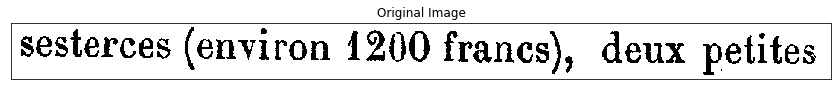

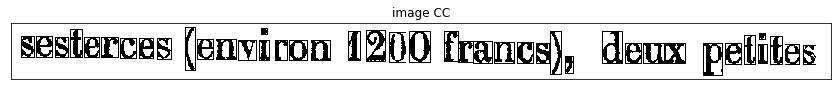

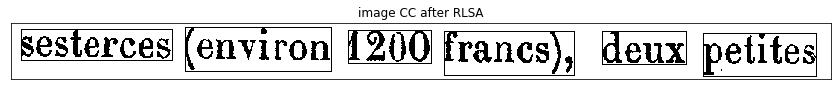

In [915]:
import cv2
import numpy as np
import os, sys
from matplotlib import pyplot as plt

img_name='row.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
img2=img_bin.copy()
contours,_  = cv2.findContours(np.uint8(np.logical_not(img_bin)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 

for contour in contours:
    #disegna un rettangolo verde intorno ai caratteri
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(img_bin, (x,y), (x+w,y+h), (0, 255, 0), 1)
    
new_name=img_name[:-4]+'_rect.tif'
cv2.imwrite(new_name,img_bin)


img_rlsa = rlsa(img_bin.copy(), value=6)

contours,_  = cv2.findContours(np.uint8(np.logical_not(img_rlsa)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 

for contour in contours:
    #disegna un rettangolo verde intorno alle parole
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(img2, (x,y), (x+w,y+h), (0, 255, 0), 1)

new_name=img_name[:-4]+'_rectRLSA.tif'
cv2.imwrite(new_name,cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))

titles = ['Original Image','image CC', 'image CC after RLSA']
images = [img, img_bin, img2]

for i in range(3):
    plt.figure(figsize=(50,50))
    plt.subplot(1,3,i+1),plt.imshow((images[i]),'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

**RLSA adattivo**

trovo le CC, faccio il quadratino, trovo il centroide del quadratino, calcolo la distanza tra i centroidi..trovo la distanza media

value 5.075479624702423


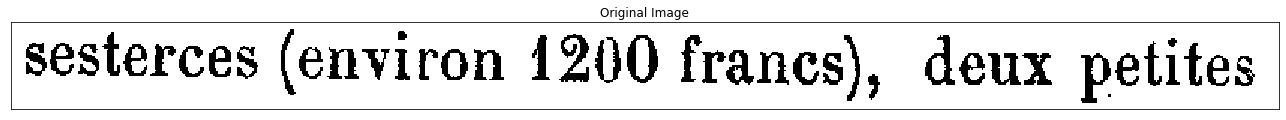

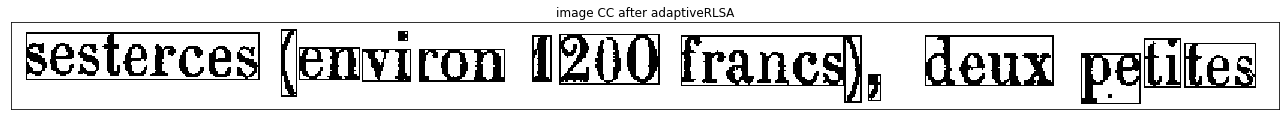

In [945]:
img_name='row.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
img2=img.copy()

pix_dist=pixelDistance(img_bin)
valueRlsa=valueRLSA(pix_dist)

#non funziona molto bene, è necessario aggiungere 2 al value trovato -- ho capito perchè RISOLVERE!!
img_rlsa = rlsa(img2.copy(), value=6)#valueRlsa)

contours,_  = cv2.findContours(np.uint8(np.logical_not(img_rlsa)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 

for contour in contours:
    #disegna un rettangolo verde intorno alle parole
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(img2, (x,y), (x+w,y+h), (0, 255, 0), 1)

titles = ['Original Image', 'image CC after adaptiveRLSA']
images = [img, img2]
cv2.imwrite('uffa.tif',cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))

for i in range(2):
    plt.figure(figsize=(50,50))
    plt.subplot(1,2,i+1),plt.imshow((images[i]),'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

## Hough Transform

best_angle: 14.72823303292863


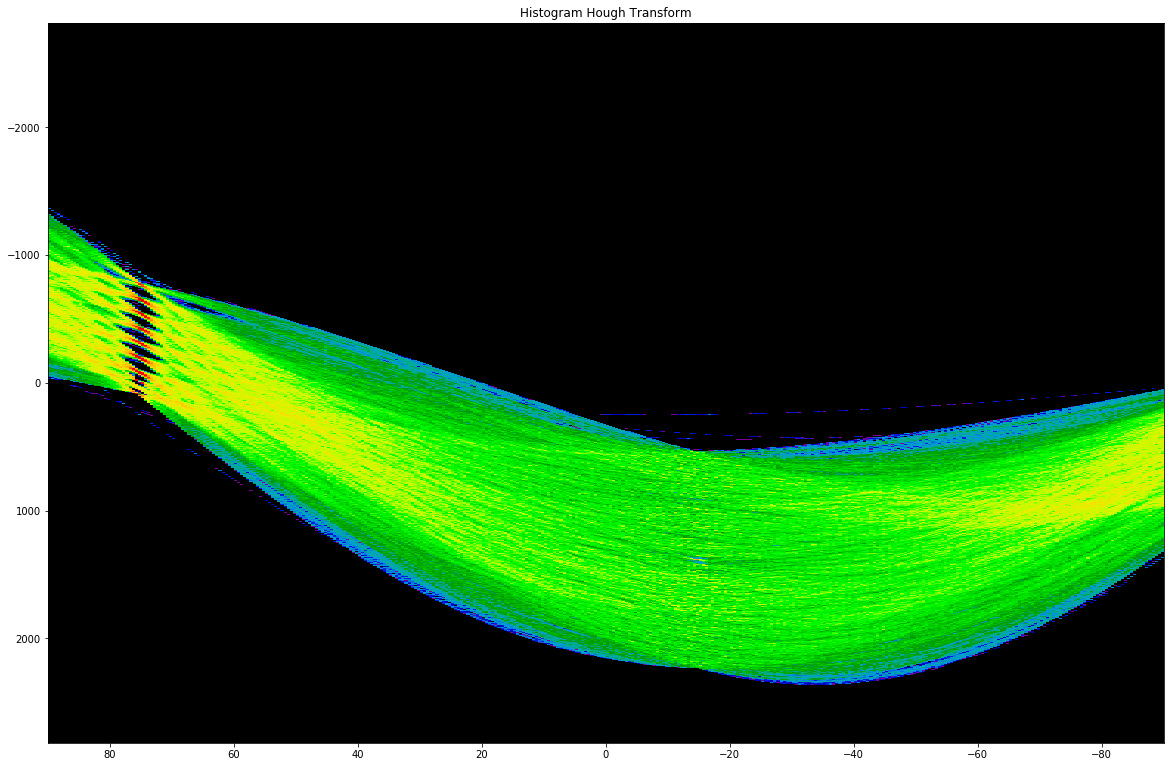

In [694]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import *
from skimage.transform import hough_line
import math

def removeFigures(binarized_img,original_img):
    contours,_ = cv2.findContours(np.uint8(np.logical_not(binarized_img)), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.ones(original_img.shape[:2], dtype="uint8") * 255
    for contour in contours:
        [x,y,w,h] = cv2.boundingRect(contour)
        if w>300 or h>300:
            cv2.drawContours(mask, [contour], -1, 0, -1)
    original_img = cv2.bitwise_and(~original_img, ~original_img, mask=mask)
    return ~original_img
        

def houghTransformDeskew(binarized_img,original_img):
  
    edges = cv2.Canny(binarized_img, 50, 200, 3)#find edges on the image
    img_lines = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR) #convert edges image from Gray to BGR

    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 80,None,100,10)#None,100 #function used for finding coordinates x0,y0 and x1,y1 for deskew
    tested_angles = np.linspace(-np.pi/2, np.pi / 2, 360)
    h, theta, d = hough_line(edges,tested_angles)#function used for plot histogram Hough transform
    
    if lines is not None:
        angle = 0.0
        num_lines = len(lines)
        
        for i in range(0, len(lines)):
            #write blue lines on image according to Hough lines
            l = lines[i][0]
            cv2.line(img_lines, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv2.LINE_AA)
            angle += math.atan2(l[3]*1.0 - l[1]*1.0,l[2]*1.0 - l[0]*1.0)
           
        
        angle /= num_lines*1.0
        best_angle = angle* 180.0 / np.pi
        
        print('best_angle:',best_angle)
        #cv2.imshow('Detected Lines with Probabilistic Line Transform', img_lines)
        cv2.imwrite('Detected Lines with Probabilistic Line Transform.png', img_lines)#non so se puo essere utile ai fini del progetto stampare le linee 
        
        (height, width) = original_img.shape[:2]
        center = (width // 2, height // 2)
        #print('width:',width,'height:',height)
        #show histogram
        plt.figure(figsize=(20,20))
        plt.imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],cmap ='nipy_spectral',aspect=1.0 / (height/30))
        plt.title('Histogram Hough Transform')
        plt.savefig('Hough Transform.png')#, dpi=1800)
        
        root_mat = cv2.getRotationMatrix2D(center, best_angle, 1)
        rotated = cv2.warpAffine(original_img, root_mat, (width,height), flags=cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE) 
        return rotated
    return None

img_name='rotazione.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
img_rlsa = rlsa(img_bin.copy(), value=6)

img_no_figures = removeFigures(img_rlsa,img)
#plt.imshow(img_no_figures), plt.xticks([]), plt.yticks([]), plt.show()
cv2.imwrite('Image Without Figures.png', img_no_figures)

rotated = houghTransformDeskew(img_no_figures,img)
if rotated is not None:
    #plt.imshow(rotated), plt.xticks([]), plt.yticks([]), plt.show()
    cv2.imwrite('Rotated Image.tif', rotated)
else:
    print('Image not skewed')

## Projection

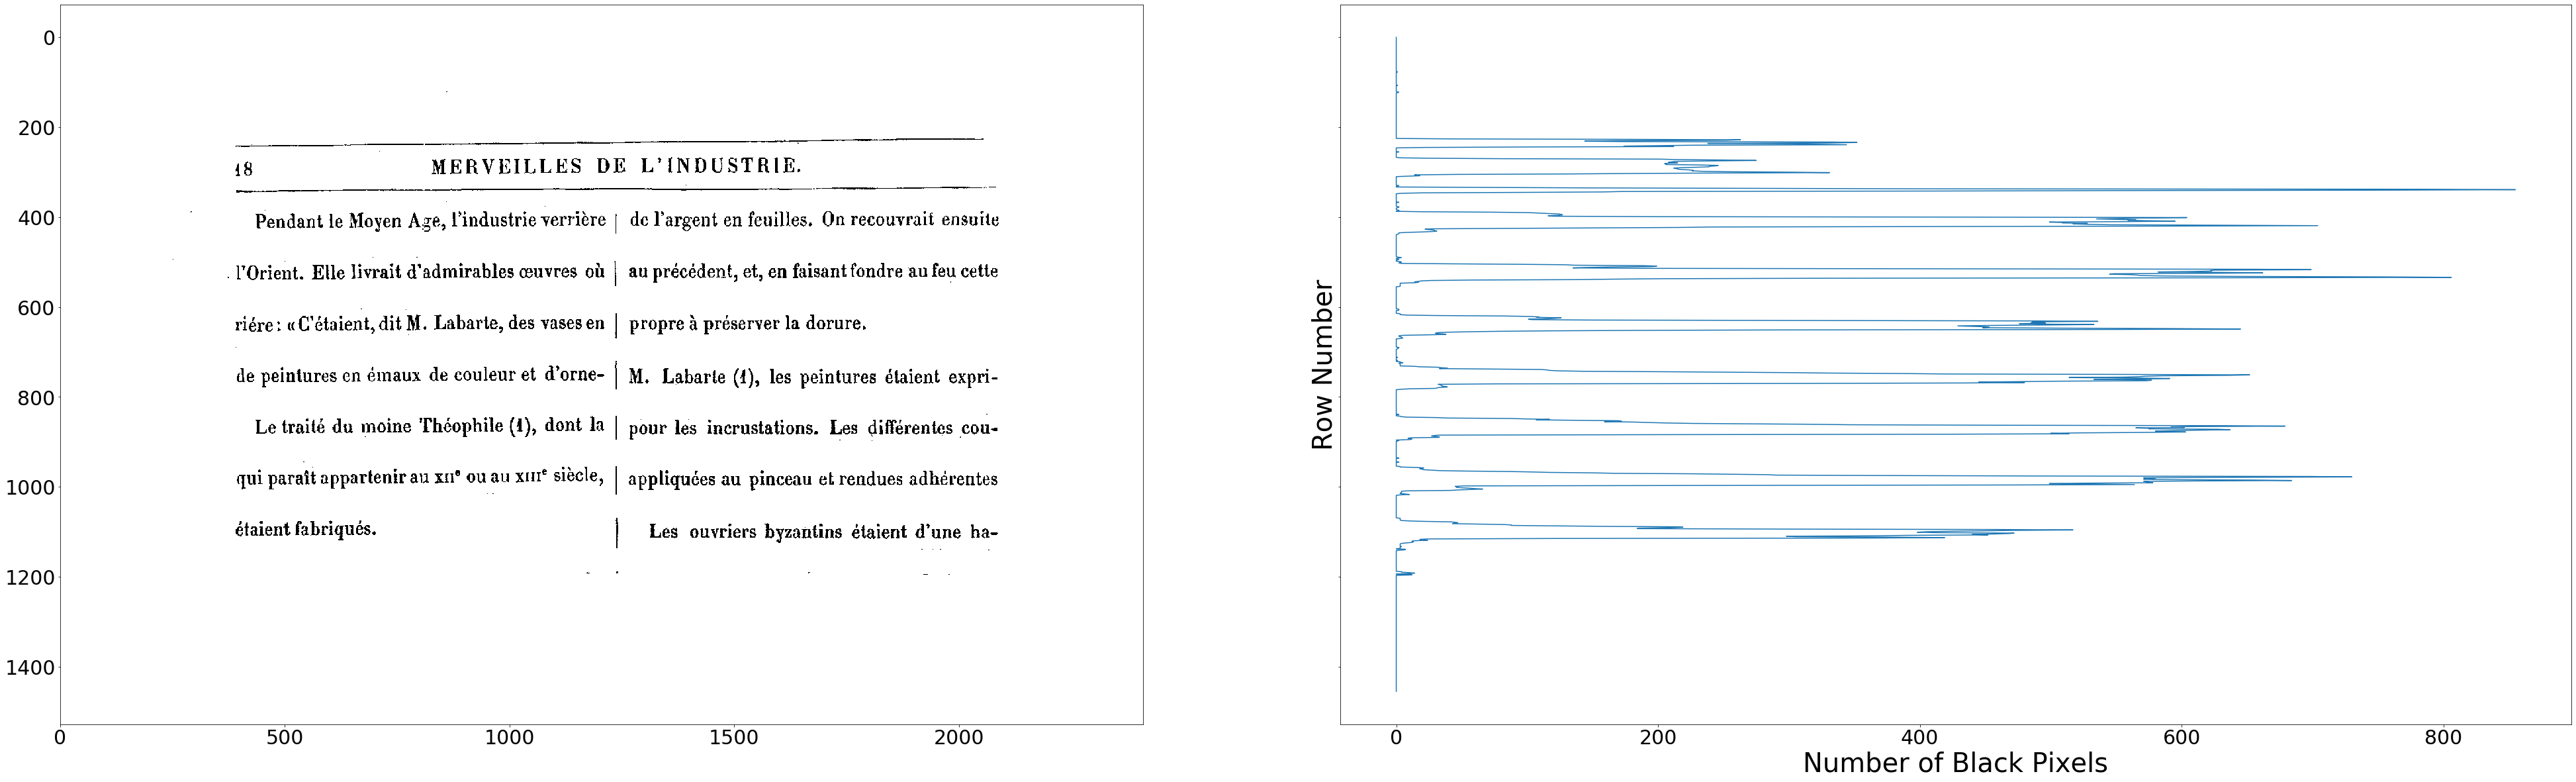

In [698]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import *

img_name='Rotated Image.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
#img_bin=img_bin.T

#Counting black pixels per row (axis=0: col, axis=1:row)
counts = np.sum(img_bin==0, axis=1) 
row_number = [i for i in range(img_bin.shape[0])]
#counts = smooth(counts,20) #ammorbidisce il grafico dei pixel

f, (ax1,ax2)= plt.subplots(1, 2, sharey=True, figsize=(70, 20))#(70,40)
ax1.imshow(img_bin,'gray')#, plt.yticks([])
ax1.tick_params(axis='both', which='major', labelsize=30)
ax2.plot(counts,row_number,label='fit')
ax2.tick_params(axis='both', which='major', labelsize=30)
plt.xlabel('Number of Black Pixels',fontsize=40)
plt.ylabel('Row Number',fontsize=40)
plt.subplots_adjust( wspace = 0.1)#-0.1
plt.savefig('Projection.png')#, dpi=1800)

plt.show()


# Layout 
## Bottom-Up methods
### MST
...

1852


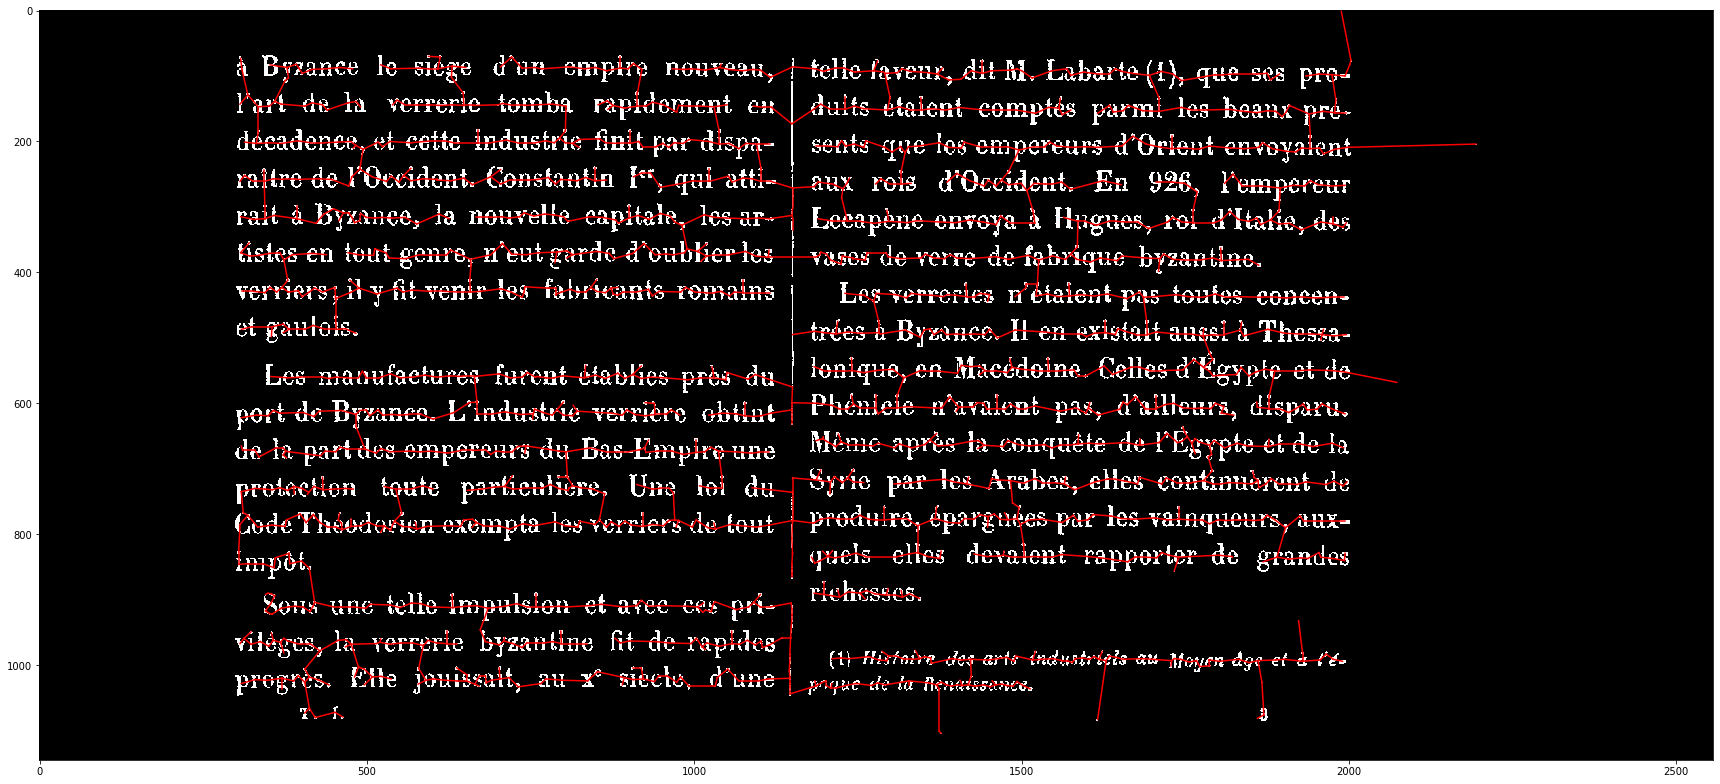

In [733]:
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import minimum_spanning_tree

def minimum_spanning_tree_edges(V, k): #return vector of edges
    
    # k: int the number of neighbor to consider for each vector
    # k = len(X)-1 gives the exact MST
    print(len(V)-1)
    k = min(len(V) - 1, k)

    # generate a sparse graph using the k nearest neighbors of each point
    G = kneighbors_graph(V, n_neighbors=k, mode='distance')

    # Compute the minimum spanning tree of this graph
    full_tree = minimum_spanning_tree(G, overwrite=True)

    return np.array(full_tree.nonzero()).T 

img_name='prova0.tif'
img = cv2.imread(img_name)
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_bin = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
img_bin_char = img_bin.copy()
img_centroids = img.copy()
points = findCentroids(img_bin,img_centroids)       
points = np.int32(points)
edges= minimum_spanning_tree_edges(points,4)

#plt.scatter(p[:, 0], p[:, 1])
plt.figure(figsize=(30,20))
plt.imshow(img, 'gray')    
for edge in edges:
    i, j = edge
    #print(edge)
    plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], c='r')
plt.show()

### DocStrum

[[ 266 1026]
 [ 292  406]
 [ 296  163]
 ...
 [2259 1306]
 [2262  166]
 [2280 1386]]
2361
4


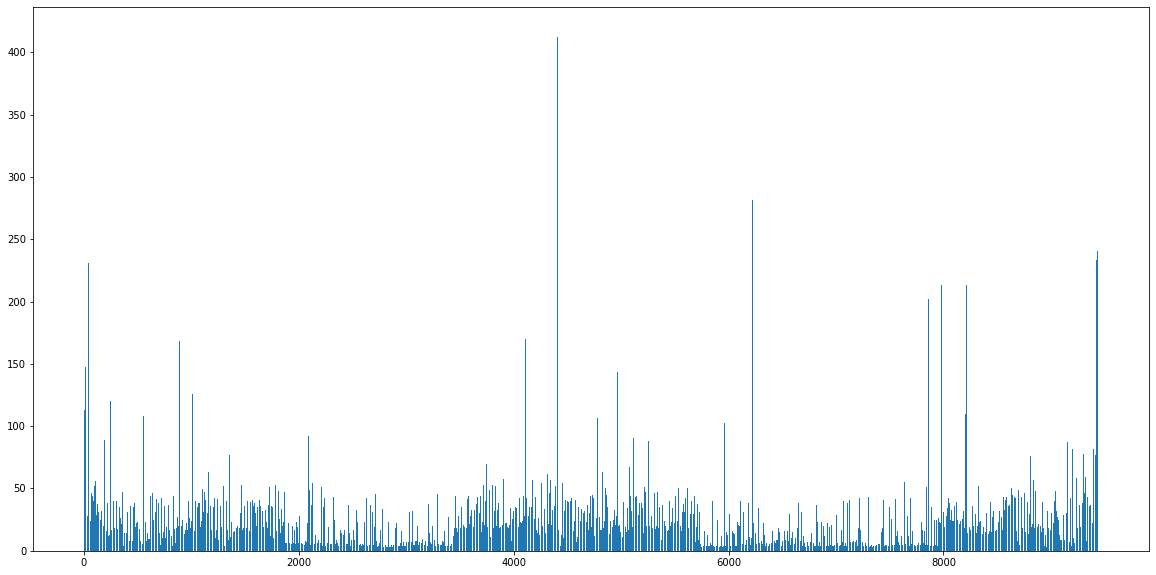

2361
5


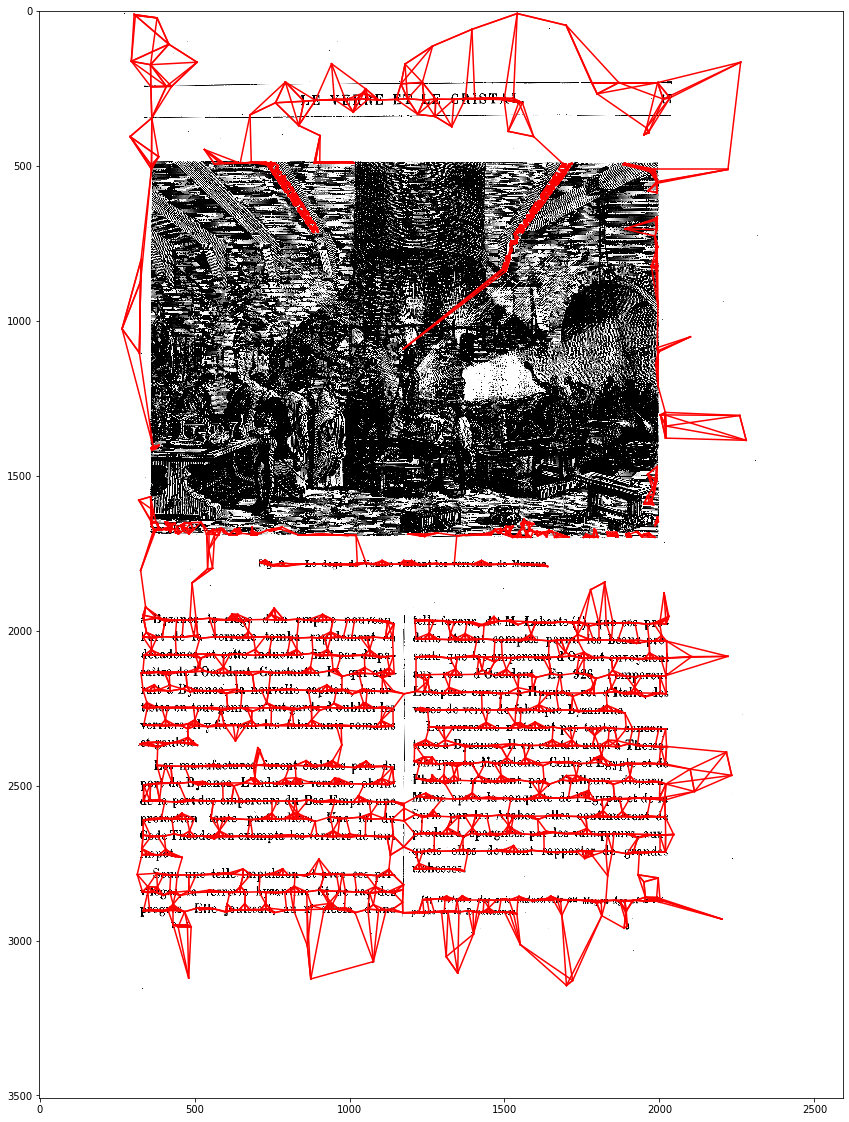

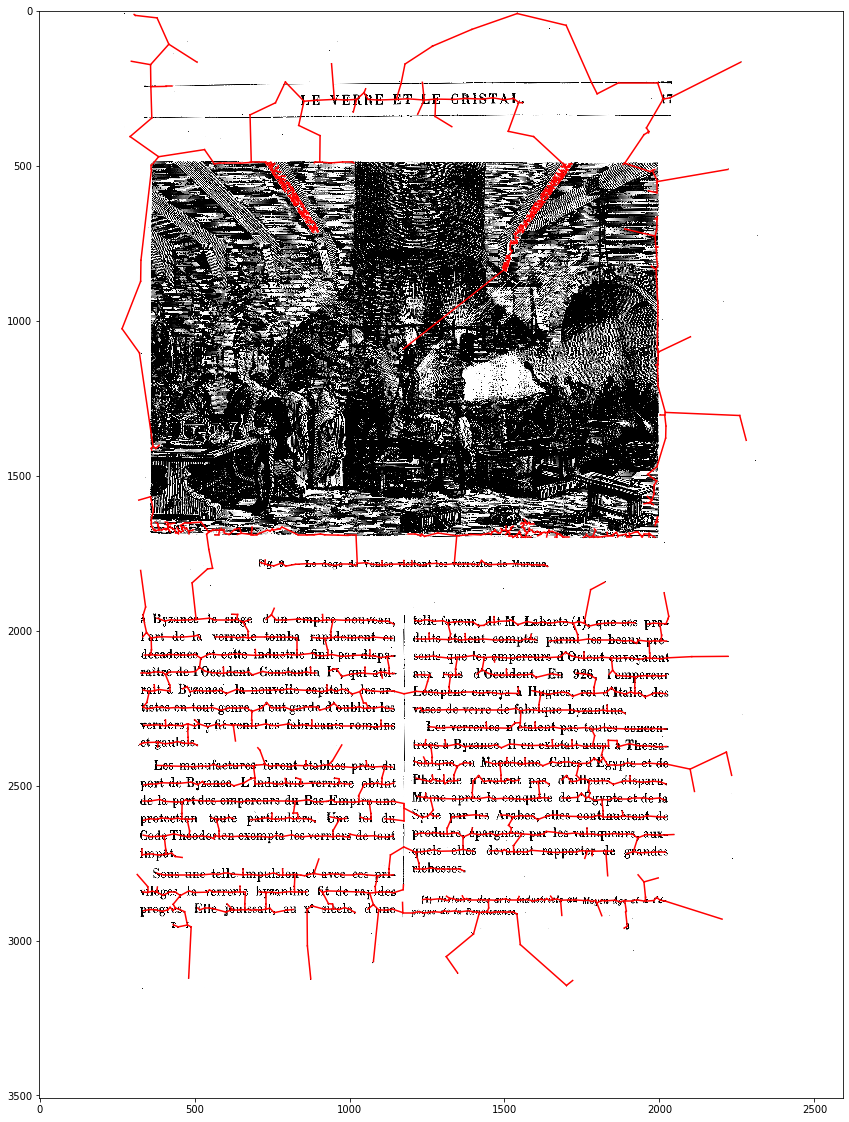

In [772]:
from sklearn.neighbors import kneighbors_graph

img = cv2.imread("prova0.tif",0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
img_bin_char = img_bin.copy()
img_centroids = img.copy()
points = findCentroids(img_bin,img_centroids)       
points = np.int32(points)
print(points)

def findCentroids(binarization,output_img):
    contours,_  = cv2.findContours(np.uint8(np.logical_not(binarization)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
    points = []
    f = open('punti.txt', 'w')
    
    for contour in contours:
        M = cv2.moments(contour)
 
        # calculate x,y coordinate of center
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            points.append((cX,cY))
            f.write(str(cX) + ' ' + str(cY) + '\n')
        else:
            cX, cY = 0, 0
            
        cv2.circle(output_img, (cX, cY), 5, (0, 255, 0), -1)
        points.sort(key=lambda x:x[0])
    f.close()
    return points

def k_neighbors_graph(V, k):
    # k: int the number of neighbor to consider for each vector
    # k = len(X)-1 gives the exact MST
    print(len(V))
    k = min(len(V) - 1, k)
    print(k)
    
    # generate a sparse graph using the k nearest neighbors of each point
    return kneighbors_graph(V, n_neighbors=k, mode='distance')

def minimum_spanning_tree_edges(V, k): #return vector of edges
    
    G = k_neighbors_graph(V, k)
    
    # Compute the minimum spanning tree of this graph
    full_tree = minimum_spanning_tree(G, overwrite=True)
    

    return np.array(full_tree.nonzero()).T 

Graph = k_neighbors_graph(points,4)           
k_kneighbors_edges = np.array(Graph.nonzero()).T
k_kneighbors_distances = Graph.data


ciao=[]
for i in range(k_kneighbors_distances.shape[0]):
    ciao.append(i)
plt.figure(figsize=(20,10))
plt.bar(ciao,k_kneighbors_distances)
plt.show()
#plt.show()
points = np.int32(points)
mst_edges= minimum_spanning_tree_edges(points,5)
'''
distance = []
for edge in edges:
    c1,c2 = edge
    x1,y1 = points[c1]
    x2,y2 = points[c2]
    print(x1,y1,x2,y2)
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    distance.append(dist)
    print(dist)
'''  
def angle_between(p1, p2):
    dx = p2[1]-p1[1]
    dy = p2[0]-p1[0]
    #ang1 = np.arctan2(p1[0],p1[1])
    #ang2 = np.arctan2(p2[0],p2[1])
    #return np.rad2deg((ang1 - ang2) % (2 * np.pi))
    arctan = math.atan2(dx,dy)
    return math.degrees(arctan)

plt.figure(figsize=(30,20))
plt.imshow(img, 'gray')    
img_blank = np.zeros(img.shape, np.uint8)
angles = []
for edge in k_kneighbors_edges:
    #i, j = edge
    i,j = edge
    x1,y1 = points[i]
    x2,y2 = points[j]
    angles.append(angle_between(points[i],points[j]))
    cv2.line(img_blank, (points[i, 0], points[i, 1]), (points[j, 0], points[j, 1]), (0,0,255), 3, cv2.LINE_AA)
    plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], c='r')
plt.show()   
oriz =[]
vert = []
for angle in angles:
    abs_angle = abs(angle)
    
    if -45<= angle <= 45 or 135 <= angle or angle <= -135:
        oriz.append(angle)
    else:
        vert.append(angle)

    
#plt.scatter(p[:, 0], p[:, 1])
plt.figure(figsize=(30,20))
plt.imshow(img, 'gray')    
for edge in mst_edges:
    #i, j = edge
    i,j = edge
    x1,y1 = points[i]
    x2,y2 = points[j]
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    #print(edge)
    #if dist<25:
    #angles.append(angle_between(points[i],points[j]))
    plt.plot([points[i, 0], points[j, 0]], [points[i, 1], points[j, 1]], c='r')
plt.show()

### Voronoi

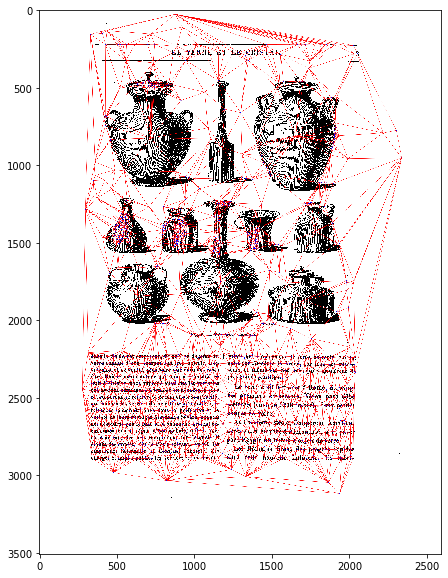

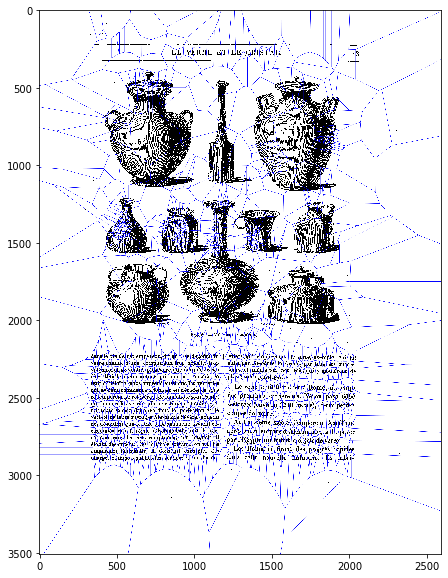

In [649]:
def printContours(binarization,output_img):
    #draw a green rectangle around to characters/words
    contours,_  = cv2.findContours(np.uint8(np.logical_not(binarization)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
    
    for contour in contours:
        [x,y,w,h] = cv2.boundingRect(contour)
        cv2.rectangle(output_img, (x,y), (x+w,y+h), (0, 255, 0), 1)
        
def findCentroids(binarization,output_img):
    contours,_  = cv2.findContours(np.uint8(np.logical_not(binarization)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
    points = []
    f = open('punti.txt', 'w')
    
    for contour in contours:
        M = cv2.moments(contour)
 
        # calculate x,y coordinate of center
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            points.append((cX,cY))
            f.write(str(cX) + ' ' + str(cY) + '\n')
        else:
            cX, cY = 0, 0
            
        cv2.circle(output_img, (cX, cY), 5, (0, 255, 0), -1)
        
    f.close()
    return points

def rect_contains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True

def draw_delaunay(img, subdiv, delaunay_color ) :

    triangleList = subdiv.getTriangleList()
    size = img.shape
    r = (0, 0, size[1], size[0])

    for t in triangleList :
        
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        
        if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
        
            cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)

def draw_voronoi(image, subdiv) :

    (facets, centers) = subdiv.getVoronoiFacetList([])

    for i in range(0,len(facets)) :
        ifacet_arr = []
        for f in facets[i] :
            ifacet_arr.append(f)
        ifacet = np.array(ifacet_arr, np.int)
        ifacets = np.array([ifacet])
        cv2.polylines(image, ifacets, True, (255, 0, 0), 1, cv2.LINE_AA, 0)

def vonoroi(points,image):
    img_vonoroi = image.copy()
    size = image.shape
    rect = (0, 0, size[1], size[0])
    subdiv = cv2.Subdiv2D(rect)
    for p in points :
        subdiv.insert(p)
    draw_delaunay( image, subdiv, (0, 0, 255) )
    for p in points :
        cv2.circle(image, p, 2, (255,0,0), cv2.FILLED, cv2.LINE_AA, 0 )

    draw_voronoi(img_vonoroi,subdiv)
    cv2.imwrite('img3.tif',image)
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    #plt.imshow(image, 'gray')
    cv2.imwrite('img4.tif',img_vonoroi)
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(img_vonoroi, cv2.COLOR_BGR2RGB))
    #plt.imshow(img_vonoroi, 'gray')
    
img_name='prova.tif'
img = cv2.imread(img_name)
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_bin = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
img_bin_char = img_bin.copy()
img_centroids = img.copy()
img_vono = img.copy() 
printContours(img_bin_char,img_bin_char) 
cv2.imwrite('img1.tif',img_bin_char)
#plt.figure(figsize=(10,10))
#plt.imshow(cv2.cvtColor(img_bin_char, cv2.COLOR_BGR2RGB))
#plt.imshow(img_bin_char, 'gray')    
points = findCentroids(img_bin,img_centroids)
cv2.imwrite('img2.tif',img_centroids)
#plt.figure(figsize=(10,10))
#plt.imshow(cv2.cvtColor(img_centroids, cv2.COLOR_BGR2RGB))
#plt.imshow(img_centroids, 'gray')
vonoroi(points, img_vono)

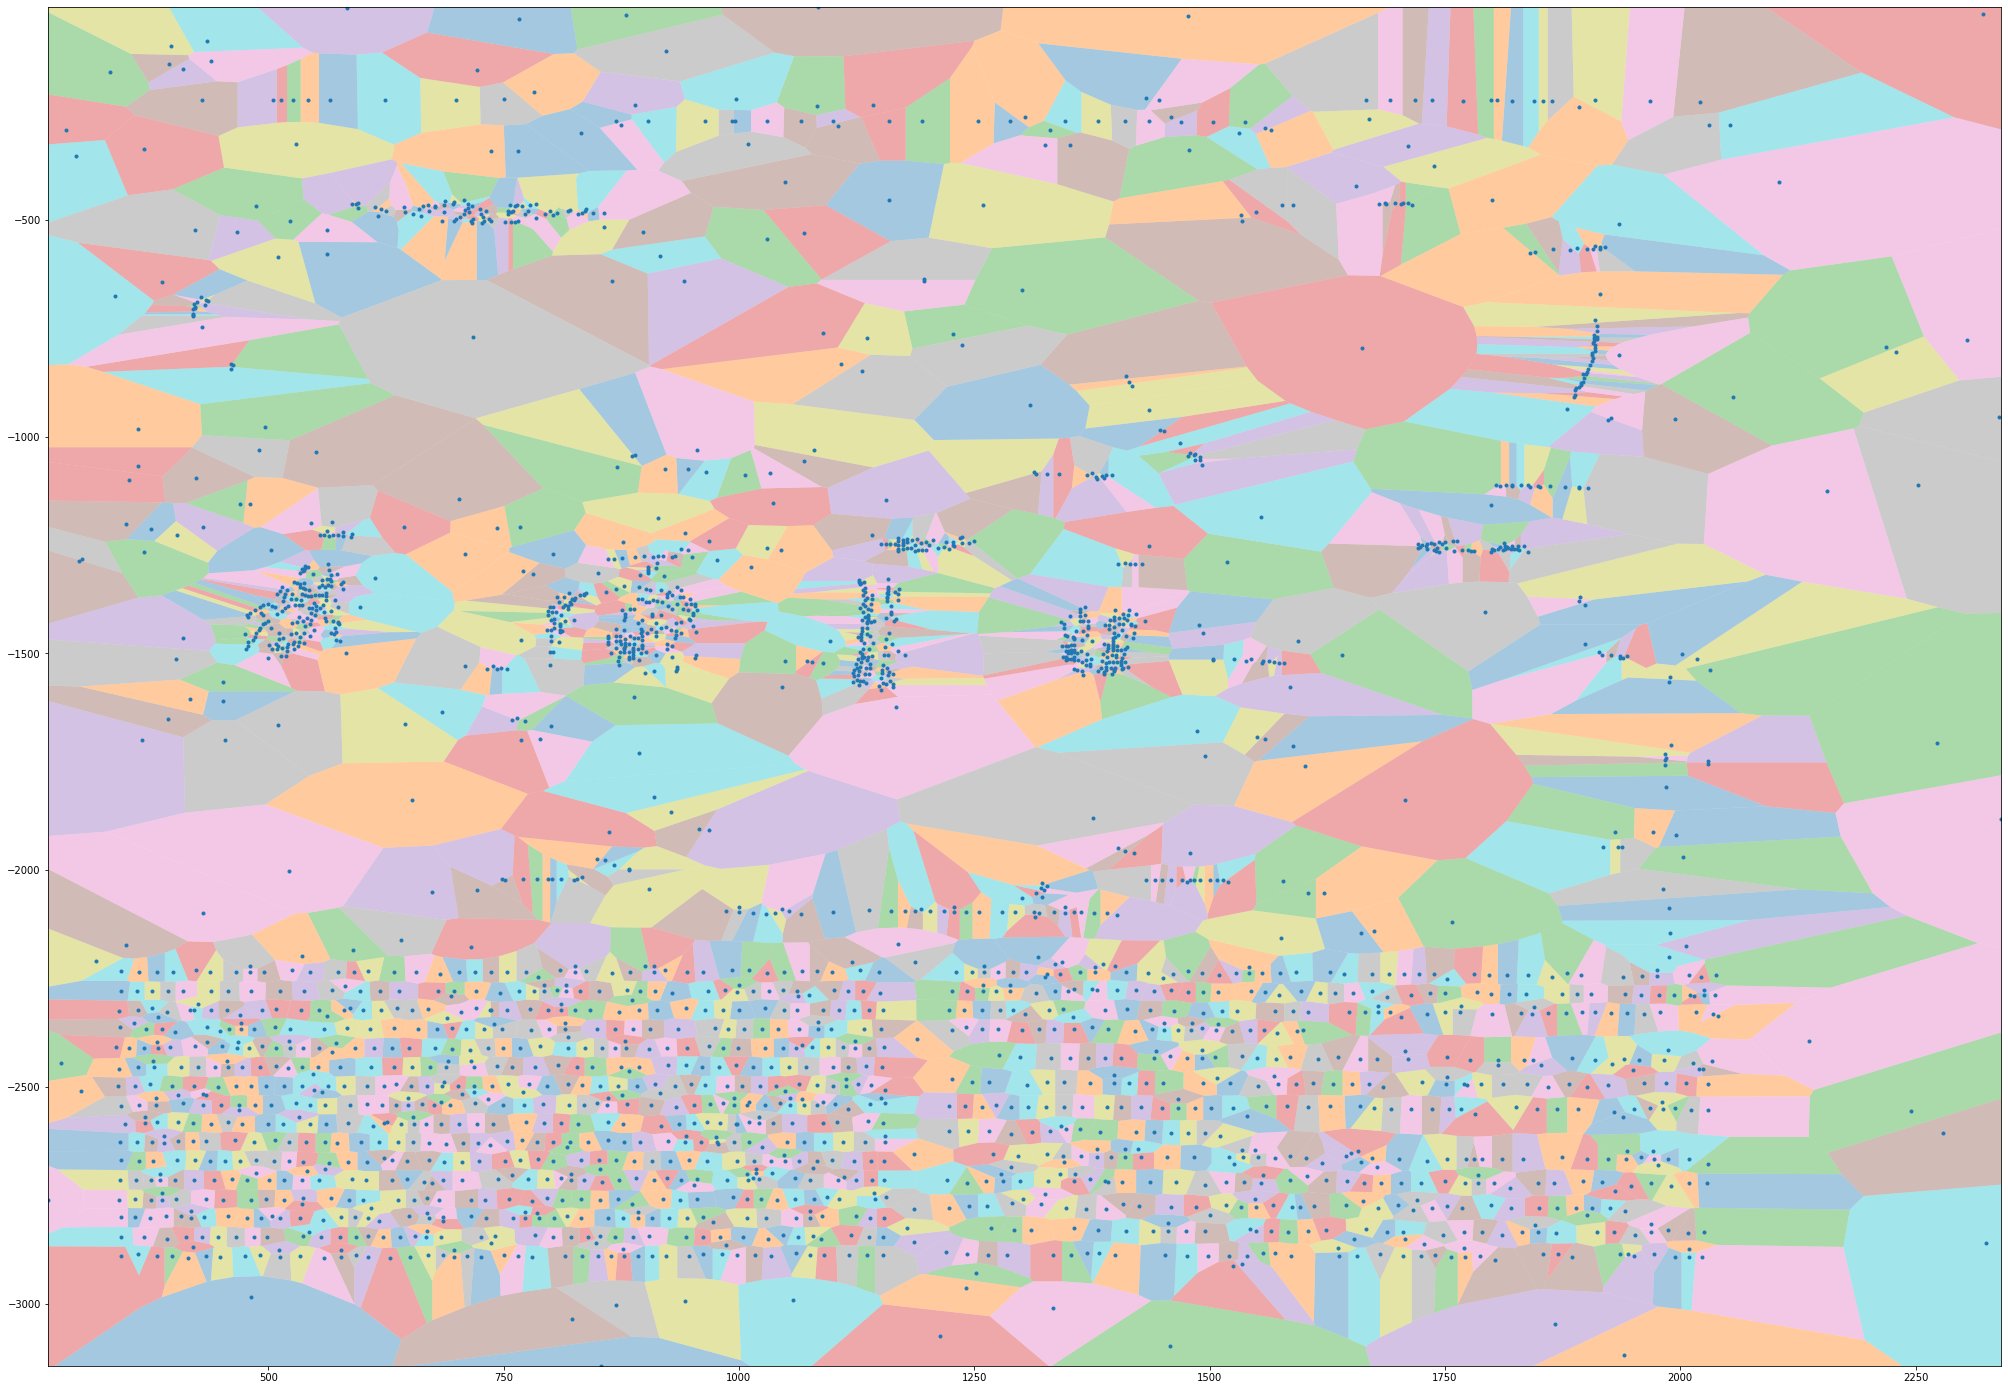

In [201]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import *
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

# make up data points
img_name='prova.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

contours,_  = cv2.findContours(np.uint8(np.logical_not(img_bin)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
points=[]
for contour in contours:
    #disegna un rettangolo verde intorno ai caratteri
    [x,y,w,h] = cv2.boundingRect(contour)
    cv2.rectangle(img_bin, (x,y), (x+w,y+h), (0, 255, 0), 1)
    points.append([(x+(x+w))/2,-(y+(y+h))/2])
points=np.array(points)

# compute Voronoi tesselation
vor = Voronoi(points)

# plot
regions, vertices = voronoi_finite_polygons_2d(vor)
#print ("--")
#print (regions)
#print ("--")
#print (vertices)

# colorize
plt.figure(figsize=(35,25))
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)


plt.plot(points[:,0], points[:,1], '.')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()


## Top-Down methods 
### XY Tree

La pagina è splittata in colonne, paragrafi, linee di testo, parole e infine caratteri.

Tramite le proiezioni faccio un taglio 

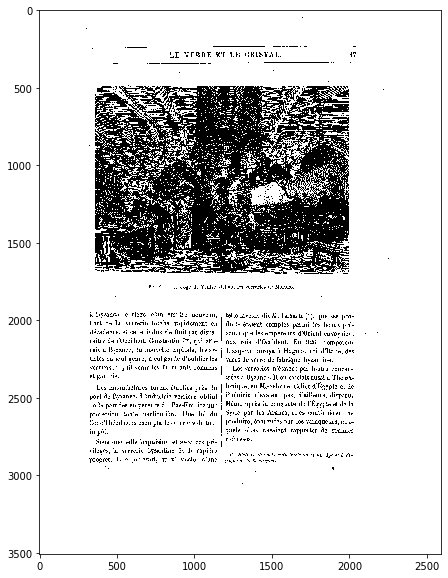

In [619]:
#TAGLIO FUNZIONA BENE!!!
import cv2
import numpy as np
from matplotlib import pyplot as plt
from random import *

img_name='prova0.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

def cutImage(image,nPixel,space,verticalCut: bool = False):
    if verticalCut:
        image = image.T
        
    #Counting black pixels per row (axis=0: col, axis=1:row)
    counts = np.sum(image==0, axis=1) 
    row_number = [i for i in range(image.shape[0])]

    cut=[]

    #cut contiene tutte le righe che hanno meno di nPixel pixel
    for i in range(counts.shape[0]):
        if(counts[i]<nPixel):
            cut.append(i)

    x=0
    h=0
    info=[]
    flag=False
    for j in range(len(cut)-1):
        if cut[j+1]-cut[j]==1:
            if flag==False:
                h=cut[j]
                flag=True
            x=x+1
        else:
            info.append([x,h,cut[j]])
            flag=False
            x=0
    info.append([x,h,cut[j]])
    #print(info)
    
    delete=[]
    for k in range(len(info)):
        if info[k][0]<space:
            delete.append(k)
    for m in range(len(delete)-1,-1,-1):
        info.remove(info[delete[m]])
    #print('[[nPixel,pStart, pEnd]]:',info)
    
    #traccia linea nera nel punto in cui taglia
    '''for k in range(image.shape[0]):
        for h in range(len(info)):
            if k==info[h][1] or k==info[h][2]:
                for t in range(image.shape[1]):
                    image[k][t]=0'''
    
    if verticalCut:
        image = image.T
        cv2.imwrite('verticalCut.tif', image)
    else:
        cv2.imwrite('horizontalCut.tif', image)
    return info

#horizontalCut
#cutImage(img_bin,50,50)
#verticalCut
cutImage(img_bin,50,20,True)

plt.figure(figsize=(10,10))
plt.imshow(img_bin,'gray')
plt.show()

------> OK <------ Taglia l'immagine e assembla l'albero

Name: A


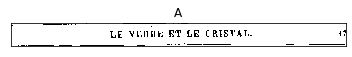

Name: B


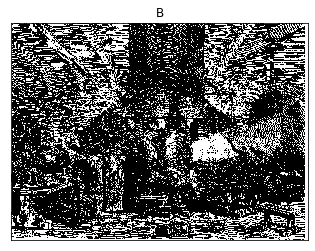

Name: C


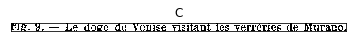

Name: D


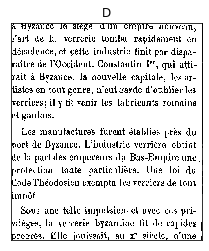

Name: E


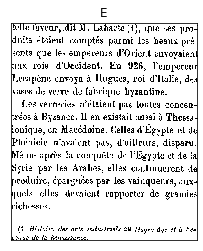

Page(root)
| | |  | 
A B C  O 
      | \
      D E


In [720]:
import os
import glob

def cutMatrix(img_name,img_bin,info, infoV):
    img_name='prova0.tif'
    img = cv2.imread(img_name, 0)
    imgV = img_bin# cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    
    path = '/Users/lorenzo/Google Drive/Magistrale/1.1/Data and Document Mining/Progetto/XY_Tree'
    
    #horizontal cut
    #imgV = cv2.imread(newName, 0)
    for i in range(len(info)-1):
        crop_img = imgV[info[i][2]:info[i+1][1],0:imgV.shape[1]]
        new_imgname=img_name[:-4]+'_horizCrop'+str(i)+'.tif'
        cv2.imwrite(os.path.join(path , new_imgname),crop_img)
        #cv2.imwrite(new_imgname, crop_img)
        #plt.imshow(crop_img, 'gray'),plt.show()
    albero=[]
    tree = Node()
    tree.name = 'Page(root)'
    #vertical cut 
    
    filelist = []
    for infile in glob.glob (os.path.join (path, 'prova*_horizCrop*.tif')):
        filelist.append (infile)
    filelist.sort()
    x=0
    y=0
    z=0
    for file in filelist:
        newRead = cv2.imread(file, 0)
        inf = cutImage(newRead,4,21,True)#4,10
        #print(inf)
        if len(inf)==1:
            print('NoCut')
            albero.append([z,file[100:-4]])
            z=z+1
            title=input("Name: ")
            #tree.add_child()
            #tree[x].name = title
            plt.title(title)
            plt.imshow(newRead, 'gray'),plt.xticks([]), plt.yticks([]),plt.show()
        else:
            flag=False
            for h in range(len(inf)-1):
                albero.append([z,file[100:-4]])
                z=z+1
                cropV = newRead[ 0:newRead.shape[0], inf[h][2]:inf[h+1][1] ]
                newNameV = file[:-4]+'_FinalVC'+str(h)+'.tif'
                cv2.imwrite(os.path.join(path , newNameV), cropV)
                title=input("Name: ")
                if len(inf)<=2:
                    tree.add_child()
                    tree[x].name = title
                    x=x+1
                elif flag==False:
                    tree.add_child()
                    tree[x].name = 'O'
                    tree[x].add_child()
                    tree[x][y].name = title
                    x=x+1
                    flag=True
                else:
                    tree[x-1].add_child()
                    tree[x-1][y].name = title
                y=y+1
                #flag=False
                plt.title(title)
                plt.imshow(cropV, 'gray'),plt.xticks([]), plt.yticks([]),plt.show()
        y=0
    print(tree)
img_name='prova0.tif'
img = cv2.imread(img_name, 0)
img_bin= cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
info=cutImage(img_bin,50,40)

infoV=cutImage(img_bin,50,20,True)
cutMatrix(img_name, img_bin, info, infoV)


!!!!Chiamata dei metodi!!!!

Name: A


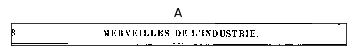

Name: B


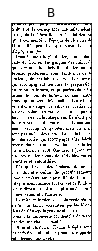

Name: C


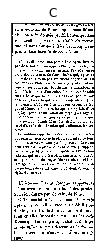

Name: D


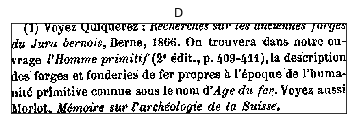

Name: E


Name: F


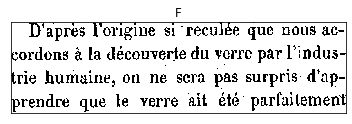

 Page(root)
|  |    |  
A  O    O  
  | \ / | \
  B C D E F


In [711]:
img_name='prova30.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
info=cutImage(img_bin,50,40)
#print(info)
infoV=cutImage(img_bin,50,21,True)
#print(infoV)
cutMatrix(img_name, img_bin,info, infoV)

**----------------------> crea l'albero <-----------------------**

In [494]:
import itertools
import operator

class Node:
    def __init__(self):
        self.name: str = ''
        self.children: List[Node] = []
        self.parent: Node = self

    def __getitem__(self, i: int) -> 'Node':
        return self.children[i]

    def add_child(self):
        child = Node()
        self.children.append(child)
        child.parent = self
        return child

    def __str__(self) -> str:
        def _get_character(x, left, right) -> str:
            if x < left:
                return '/'
            elif x >= right:
                return '\\'
            else:
                return '|'

        if len(self.children):
            children_lines: Sequence[List[str]] = list(map(lambda child: str(child).split('\n'), self.children))
            widths: Sequence[int] = list(map(lambda child_lines: len(child_lines[0]), children_lines))
            max_height: int = max(map(len, children_lines))
            total_width: int = sum(widths) + len(widths) - 1
            left: int = (total_width - len(self.name) + 1) // 2
            right: int = left + len(self.name)

            return '\n'.join((self.name.center(total_width),
                ' '.join(map(lambda width, position: _get_character(position - width // 2, left, right).center(width),
                             widths, itertools.accumulate(widths, operator.add))),
                *map(lambda row: ' '.join(map(
                        lambda child_lines: child_lines[row] if row < len(child_lines) else ' ' * len(child_lines[0]),
                        children_lines)),range(max_height))))
        else:
            return self.name
        
'''       
tree = Node()
tree.name = 'Page(root)'

tree.add_child()
tree[0].name = 'Child node 0'
tree.add_child()
tree[1].name = 'Child node 1'
tree[0].add_child()
tree[0][0].name = 'Grandchild 1.0'
print(tree)
'''

         Page(root)        
      /             \      
 Child node 0  Child node 1
      |                    
Grandchild 1.0             


In [3]:
# Important Imports
import numpy as np
from PIL import Image
from scipy.signal import find_peaks

# image = PIL.Image, n = Number of Segments
# ignoreBottomTop = Segmentation of top and bottom of Image
# axis = 0 (for vertical-lines) or 1 (for horizontal-lines)
# Returns a gray image, PIL Image.
def recursiveXYCut(image, n, ignoreBottomTop = True, axis = 1):
    image = image.convert('L')
    image_arr = np.asarray(image)
    # distance for peaks
    distance = image_arr.shape[0 if axis == 1 else 1]/n
    # Sum the pixels along given axis
    sum_vals = image_arr.sum(axis = axis)
    # Get the indices of the peaks
    peaks, _ = find_peaks(sum_vals, distance=distance)
    # Temp variable to create segment lines i.e. 0 out the required values.
    temp = np.ones(image_arr.shape)
    # Skip top and bottom segmentation or not (depends on the param)
    #for peak in peaks[1:-1 if ignoreBottomTop else ]:
    for peak in peaks[1:-1] if ignoreBottomTop else peaks:
        if axis == 1:
            temp[range(peak-2, peak+2)] = 0
        else:
            temp[:, range(peak-2, peak+2)] = 0
    return Image.fromarray(np.uint8(image_arr * temp))

img_name='prova0.tif'
img = cv2.imread(img_name, 0)
img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
image=Image.open('prova0.tif')
funziona= recursiveXYCut(image,n=10)
funziona.show()
#cv2.imwrite('sefunzionapigliabene.tif', funziona)

NameError: name 'cv2' is not defined

###### Erosione e Dilatazione

In [729]:
path = '/Users/lorenzo/Google Drive/Magistrale/1.1/Data and Document Mining/Progetto/pulizia'
img = cv2.imread('taglioD.tif',0)
img = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
cv2.imwrite(os.path.join(path,'ero.tif'), erosion)
dilation = cv2.dilate(erosion,kernel,iterations = 1)
cv2.imwrite(os.path.join(path,'dila.tif'), dilation)
opening = cv2.morphologyEx(img, cv2.MO RPH_OPEN, kernel)
cv2.imwrite(os.path.join(path,'all.tif'), opening)

True

PYtesseract FUNZIONA

In [ ]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
img = cv2.imread('facile.tif',0)
text = pytesseract.image_to_string(Image.open('facile.tif'))
os.remove('facile.tif')
print(text)
# show the output images
plt.imshow(img, 'gray')

facets 5
33 48
43 44
57 45
60 51
51 142

size 88 115
19 47
33 48
51 142
54 215
-466 160

size 88 115
75 65
90 65
127 236
85 222

size 88 115
60 51
75 65
85 222
54 215
51 142

size 88 115
119 37
216 16
297 297
127 236
90 65

size 88 115
59 44
78 35
119 37
90 65
75 65
60 51
57 45

size 88 115
32 -63
19 47
-466 160
-491 159
32 -359

size 88 115
59 -335
59 44
57 45
43 44
32 -63
32 -359
57 -387

size 88 115
43 44
33 48
19 47
32 -63

size 88 115
78 35
59 -335
57 -387
182 -536
216 16
119 37

size 88 115
59 -335
78 35
59 44

size 88 115


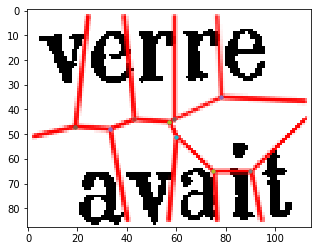

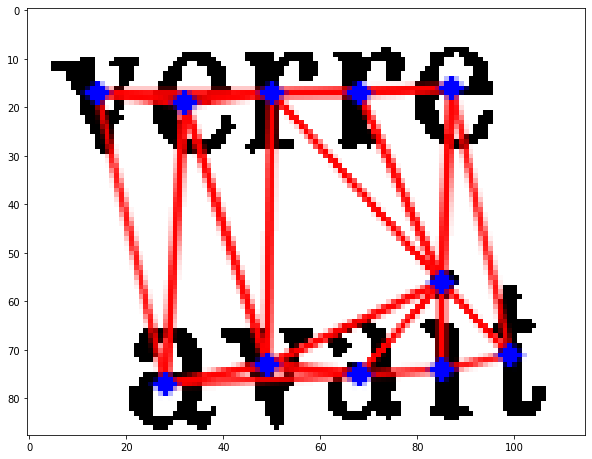

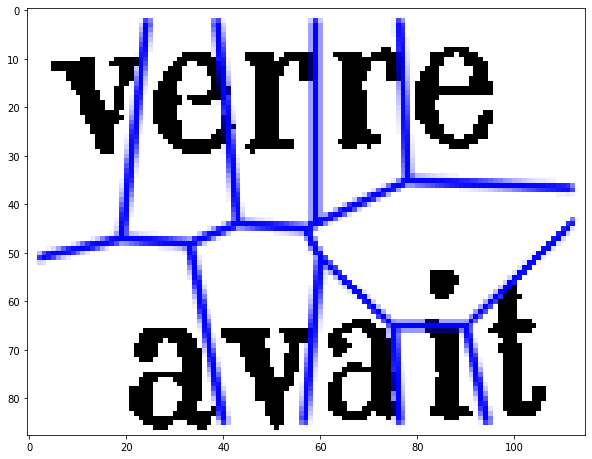

In [978]:
def printContours(binarization,output_img):
    #draw a green rectangle around to characters/words
    contours,_  = cv2.findContours(np.uint8(np.logical_not(binarization)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
    
    for contour in contours:
        [x,y,w,h] = cv2.boundingRect(contour)
        cv2.rectangle(output_img, (x,y), (x+w,y+h), (0, 255, 0), 1)
        
def findCentroids(binarization,output_img):
    contours,_  = cv2.findContours(np.uint8(np.logical_not(binarization)),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) 
    points = []
    f = open('punti.txt', 'w')
    
    for contour in contours:
        M = cv2.moments(contour)
 
        # calculate x,y coordinate of center
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            points.append((cX,cY))
            f.write(str(cX) + ' ' + str(cY) + '\n')
        else:
            cX, cY = 0, 0
            
        cv2.circle(output_img, (cX, cY), 5, (0, 255, 0), -1)
        
    f.close()
    return points

def rect_contains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True

def draw_delaunay(img, subdiv, delaunay_color ) :

    triangleList = subdiv.getTriangleList()
    size = img.shape
    r = (0, 0, size[1], size[0])

    for t in triangleList :
        
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        
        if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
        
            cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)

def draw_voronoi(image, subdiv) :

    (facets, centers) = subdiv.getVoronoiFacetList([])
    
    print('facets',len(facets[0]))
    '''for j in range(len(facets)) :
        for i in range(len(facets[j])):
            plt.plot(facets[j][i][0],facets[j][i][1],'.')
            plt.imshow(image)'''

    for i in range(len(facets)) :
        ifacet_arr = []
        for f in facets[i] :
            ifacet_arr.append(f)
        ifacet = np.array(ifacet_arr, np.int)
        ifacets = np.array([ifacet])
        
        
        for j in range(len(ifacets)) :
            for i in range(len(ifacets[j])):
                print(ifacets[j][i][0],ifacets[j][i][1])
                plt.plot(ifacets[j][i][0],ifacets[j][i][1],'.')
                plt.imshow(image)
            print()
        print('size',image.shape[0],image.shape[1])
        
        cv2.polylines(image, ifacets, True, (255, 0, 0), 1, cv2.LINE_AA, 0)

def vonoroi(points,image):
    img_vonoroi = image.copy()
    size = image.shape
    rect = (0, 0, size[1], size[0])
    subdiv = cv2.Subdiv2D(rect)
    for p in points :
        subdiv.insert(p)
    draw_delaunay( image, subdiv, (0, 0, 255) )
    for p in points :
        cv2.circle(image, p, 2, (255,0,0), cv2.FILLED, cv2.LINE_AA, 0 )

    draw_voronoi(img_vonoroi,subdiv)
    cv2.imwrite('img3.tif',image)
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    #plt.imshow(image, 'gray')
    cv2.imwrite('img4.tif',img_vonoroi)
    plt.figure(figsize=(10,10))
    plt.imshow(cv2.cvtColor(img_vonoroi, cv2.COLOR_BGR2RGB))
    #plt.imshow(img_vonoroi, 'gray')
    
img_name='facile.tif'
img = cv2.imread(img_name)
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_bin = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
img_bin_char = img_bin.copy()
img_centroids = img.copy()
img_vono = img.copy() 
printContours(img_bin_char,img_bin_char) 
cv2.imwrite('img1.tif',img_bin_char)
#plt.figure(figsize=(10,10))
#plt.imshow(cv2.cvtColor(img_bin_char, cv2.COLOR_BGR2RGB))
#plt.imshow(img_bin_char, 'gray')    
points = findCentroids(img_bin,img_centroids)
cv2.imwrite('img2.tif',img_centroids)
#plt.figure(figsize=(10,10))
#plt.imshow(cv2.cvtColor(img_centroids, cv2.COLOR_BGR2RGB))
#plt.imshow(img_centroids, 'gray')
vonoroi(points, img_vono)

In [31]:
import igraph
from igraph import Graph, EdgeSeq
nr_vertices = 3
v_label = list(map(str, range(nr_vertices)))
print(v_label)
G = Graph.Tree(nr_vertices, 2) # 2 stands for children number
print(G)
lay = G.layout('rt')

position = {k: lay[k] for k in range(nr_vertices)}
Y = [lay[k][1] for k in range(nr_vertices)]
M = max(Y)

es = EdgeSeq(G) # sequence of edges
E = [e.tuple for e in G.es] # list of edges

L = len(position)
Xn = [position[k][0] for k in range(L)]
Yn = [2*M-position[k][1] for k in range(L)]
Xe = []
Ye = []
for edge in E:
    Xe+=[position[edge[0]][0],position[edge[1]][0], None]
    Ye+=[2*M-position[edge[0]][1],2*M-position[edge[1]][1], None]

labels = v_label

['0', '1', '2']
IGRAPH U--- 3 2 --
+ edges:
0--1 0--2


In [33]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=Xe,
                   y=Ye,
                   mode='lines',
                   line=dict(color='rgb(210,210,210)', width=1),
                   hoverinfo='none'
                   ))
fig.add_trace(go.Scatter(x=Xn,
                  y=Yn,
                  mode='markers',
                  name='bla',
                  marker=dict(symbol='circle-dot',
                                size=18,
                                color='#6175c1',    #'#DB4551',
                                line=dict(color='rgb(50,50,50)', width=1)
                                ),
                  text=labels,
                  hoverinfo='text',
                  opacity=0.8
                  ))

igraph.Vertex(<igraph.Graph object at 0x12744f350>, 0, {'name': 'A', 'type': 'root'})


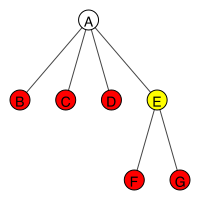

In [141]:
g = Graph()
g.add_vertices(5)
g.add_edges ([(0,1),(0,2),(0,3),(0,4)])
g.add_vertices(1)
g.add_edges ([(4,5)])
g.add_vertices(1)
g.add_edges ([(4,6)])

g.vs["name"] = ["A", "B", "C", "D","E","F","G"]
g.vs["type"] = ["root", "leaf", "leaf", "leaf","node","leaf","leaf"]
print(g.vs[0])
g.vs["label"] = g.vs["name"]
color_dict = {"root": "white", "leaf": "red", "node": "yellow"}
g.vs["color"] = [color_dict[gender] for gender in g.vs["type"]]

layout = g.layout("tree")
igraph.plot(g, layout = layout, bbox = (200, 200), margin = 20)

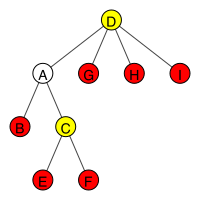

In [140]:
g = Graph()
g.add_vertices(4)
g.add_edges ([(0,1),(0,2),(0,3)])#,(0,4)])
g.add_vertices(2)
g.add_edges ([(2,4),(2,5)])



g.add_vertices(3)
g.add_edges ([(3,7),(3,8),(3,6)])

g.vs["name"] = ["A","B","C","D","E","F","G","H","I","L"]
g.vs["type"] = ["root", "leaf", "node", "node","leaf","leaf","leaf","leaf","leaf","leaf"]#, "f", "m", "m"]
g.vs["label"] = g.vs["name"]
color_dict = {"root": "white", "leaf": "red", "node": "yellow"}#, "d": "pink", "e":"blue"}
g.vs["color"] = [color_dict[gender] for gender in g.vs["type"]]

layout = g.layout("tree")
igraph.plot(g, layout = layout, bbox = (200, 200), margin = 20)
